In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


# Allows to render plots directly within the notebook
%matplotlib inline

In [2]:
### Code for simulating the coin flips and for computing the average

p = np.random.random() # Probability for heads, 0<p<1
RunningAverages = []
Xn = 0

for i in range(1000):  # Simulates coin flips running from 1 to 1000 trials
    coin = np.random.random() # Random coin flip
    if coin <= p:  
        Xi = 1  # 1 denotes Head
    else:
        Xi = 0  # 0 denotes Tail
    Xn = Xn + Xi
    RunningAverages.append(Xn/(i+1))

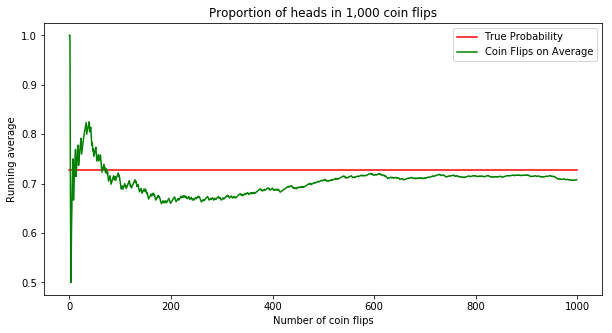

In [3]:
plt.figure(figsize=(10,5))
plt.title("Proportion of heads in 1,000 coin flips")
plt.plot(np.arange(1000), p*np.ones(1000),'-',color="red",label="True Probability") 
plt.plot(np.arange(1000), RunningAverages, '-', color="green", label="Coin Flips on Average")
plt.xlabel("Number of coin flips")
plt.ylabel("Running average")
plt.legend(loc="upper right")

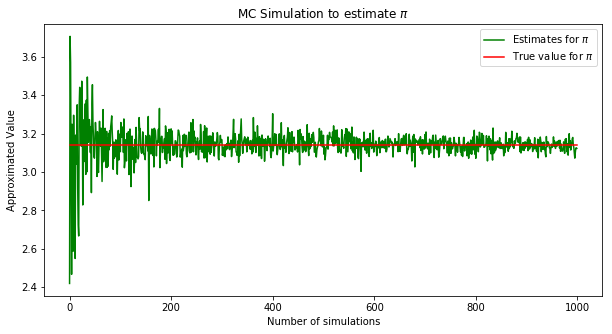

In [4]:
def Xi_array(n): # Function for outputting an array of X_i for i=1,2,..., X_i are random samples 
    
    Xi = []
    
    for i in range(1,n+1):
        Ui = np.random.uniform(0,1) # Generates independent Uniformly distributed R.V.
        Xi.append((4*math.sqrt(1-(Ui)**2)))
    
    return(Xi) 

### Code for MC Simulation 

mc_estimates = []
for i in range(2, 1002):
    
    Xi = Xi_array(i) # Function call for generating random samples of size i 
    Xn = np.sum(Xi)*(1/i) # Computation of sample mean 
    mc_estimates.append(Xn)

plt.figure(figsize=(10,5))
plt.title("MC Simulation to estimate $\pi$")
plt.plot(np.arange(1000), mc_estimates, '-', color="green", label="Estimates for $\pi$")
plt.plot(np.arange(1000),np.pi*np.ones(1000),'-',color="red",label="True value for $\pi$")
plt.xlabel("Number of simulations")
plt.ylabel("Approximated Value")
plt.legend(loc="upper right")

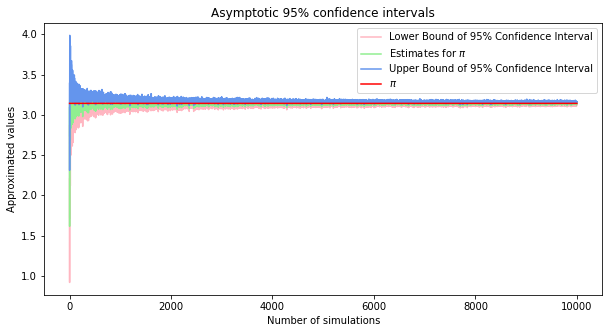

In [5]:
def sVar(n, Xi, Xn): # Function for computing sample variance 
    
    Sn2 = 0
    
    for i in range(0,n):
        Sn2 += (1/(n-1))*(Xi[i] - Xn)**2 
    
    return(Sn2)

## Code for Monte Carlo Simulation (Computation of sample mean and sample variance)
mc_estimates = []
lowerbound = []
upperbound =[]
for i in range(2, 10002):
    
    Xi = Xi_array(i) # Function call for generating random samples of size i 
    Xn = np.sum(Xi)*(1/i) # Computation sample mean 
    Sn2 = sVar(i, Xi, Xn) # Function call for computing sample variance
    
    mc_estimates.append(Xn)
    lowerbound.append(Xn - ((1.96*math.sqrt(Sn2))/math.sqrt(i))) # Computes Lower Bound of CI 
    upperbound.append(Xn + ((1.96*math.sqrt(Sn2))/math.sqrt(i))) # Computes Upper Bound of CI 
    
plt.figure(figsize=(10,5))
plt.title("Asymptotic 95% confidence intervals")
plt.plot(np.arange(10000),lowerbound,'-',color="lightpink",label="Lower Bound of 95% Confidence Interval") 
plt.plot(np.arange(10000), mc_estimates, '-', color="lightgreen", label="Estimates for $\pi$")
plt.plot(np.arange(10000),upperbound,'-',color="cornflowerblue",label="Upper Bound of 95% Confidence Interval") 
plt.plot(np.arange(10000),np.pi*np.ones(10000),'-',color="red",label="$\pi$") 
plt.xlabel("Number of simulations")
plt.ylabel("Approximated values")
plt.legend(loc="upper right")

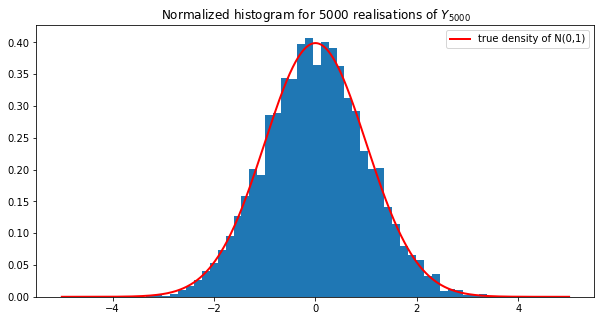

In [6]:
### Code for Simulation of random variable Y_5000 
Yn = []
for k in range(5000):
    
    Xi = Xi_array(5000) # Function call for generating random samples of size i 
    Xn = np.sum(Xi)*(1/5000) # Computes sample mean 
    sv = sVar(5000, Xi, Xn) # Function call for computing sample variance

    Yn.append((Xn-np.pi)*(np.sqrt(5000)/np.sqrt(sv)))
        
I = np.linspace(-5,5,1000) 

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 5000 realisations of $Y_{5000}$")
plt.hist(Yn, bins='auto', density='True')
plt.plot(I, 1/(np.sqrt(2 * np.pi)) * np.exp( - (I)**2 / 2 ), linewidth=2, color='r', label="true density of N(0,1)")
plt.legend()
